In [6]:
import os
import pandas as pd
import logomaker as lg
import matplotlib.pyplot as plt

In [20]:
####USER DEFINED VARIABLES####
df_path = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240514_r1-hs_tite_seq_reps_filtered/r1-hs_tite_seq_rep1_rep2_filtered_bbs_all_merged.csv'

outdir = '/Users/stephaniecrilly/Kortemme_lab/helix_sliding/20240514_r1-hs_tite_seq_reps_filtered/figures'
exp_id = 'r1-hs_tite_seq_rep1_rep2'

####

In [21]:
if not os.path.exists(outdir):
   os.makedirs(outdir)

#read in data
df = pd.read_csv(df_path)


Kd data from tite-seq experiments were binned according to how they differ from library controls (bm01-alfa-t3 for min0 state, non-binders, bm01-alfa-t6 for min2 state, binders). 

Plotting seq logos of the different design sets for designs with binding behavior as designed and behavior that deviates from the design to see if there are sequence features that may be contributing to binding behavior. Particularly interested in the regions at N-term and C-term that may influence interaction of Nb-ALFA with the tag. 

(5, 75)


Text(0.5, 0, 'aa')

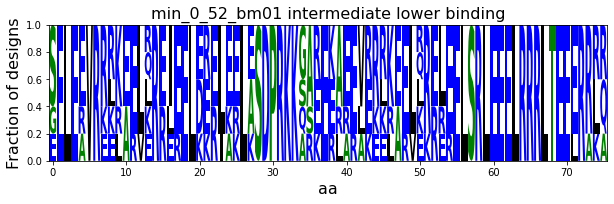

In [25]:
#min0_52 seq logos
#separating these out to plot by loop type because sequences the same otherwise for this design set
min_type = 'min_0_52_bm01'
binding_bin = 'intermediate lower binding'

min0_52_bm01_expected_binding_df = df[df['min_type'].str.contains(min_type, na=False)]
# min0_52_bm01_expected_binding_df  = min0_52_bm01_expected_binding_df[(min0_52_bm01_expected_binding_df['Kds_norm_to_expected_binned_rep1'] == binding_bin) &
#                                 (min0_52_bm01_expected_binding_df['Kds_norm_to_expected_binned_rep2'] == binding_bin) &
#                                  (min0_52_bm01_expected_binding_df['errs_rep1'] > 0.7) &
#                                  (min0_52_bm01_expected_binding_df['errs_rep2'] > 0.7)]

min0_52_bm01_expected_binding_df  = min0_52_bm01_expected_binding_df[(min0_52_bm01_expected_binding_df['Kds_norm_to_expected_binned_rep2'] == binding_bin)]


print(min0_52_bm01_expected_binding_df.shape)

seq_list_for_logo = min0_52_bm01_expected_binding_df['full_protein_sequence'].tolist()

seq_logo_mat = lg.alignment_to_matrix(seq_list_for_logo, counts=None,
to_type='counts', characters_to_ignore='X')

seq_logo_mat_norm = seq_logo_mat.div(len(seq_list_for_logo))

ro2_logo = lg.Logo(seq_logo_mat_norm, color_scheme='chemistry') 
ro2_logo.ax.set_xticks(range(0, 80, 10))
ro2_logo.ax.set_title(f'{min_type} {binding_bin}', fontsize=16)
ro2_logo.ax.set_ylabel('Fraction of designs', fontsize=16)
ro2_logo.ax.set_xlabel('aa', fontsize=16)

#ro2_logo_fig = ro2_logo.get_figure()
#plt.savefig('test.pdf')


(7, 75)


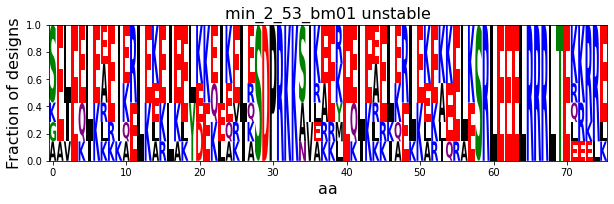

In [16]:
#plot for rep2 min_2_53_bm01 ss > and < 1 
min_type = 'min_2_53_bm01'
stability = 'unstable'

filtered_df = df[df['min_type'].str.contains(min_type, na=False)]
# min0_52_bm01_expected_binding_df  = min0_52_bm01_expected_binding_df[(min0_52_bm01_expected_binding_df['Kds_norm_to_expected_binned_rep1'] == binding_bin) &
#                                 (min0_52_bm01_expected_binding_df['Kds_norm_to_expected_binned_rep2'] == binding_bin) &
#                                  (min0_52_bm01_expected_binding_df['errs_rep1'] > 0.7) &
#                                  (min0_52_bm01_expected_binding_df['errs_rep2'] > 0.7)]

filtered_df  = filtered_df[(filtered_df['stabilityscore'] < 1)]
print(filtered_df.shape)

seq_list_for_logo = filtered_df['full_protein_sequence'].tolist()

seq_logo_mat = lg.alignment_to_matrix(seq_list_for_logo, counts=None,
to_type='counts', characters_to_ignore='X')

seq_logo_mat_norm = seq_logo_mat.div(len(seq_list_for_logo))

logo = lg.Logo(seq_logo_mat_norm, color_scheme='chemistry') 
logo.ax.set_xticks(range(0, 80, 10))
logo.ax.set_title(f'{min_type} {stability}', fontsize=16)
logo.ax.set_ylabel('Fraction of designs', fontsize=16)
logo.ax.set_xlabel('aa', fontsize=16)

#logo_fig = logo.get_figure()
#plt.savefig(f'{outdir}/{exp_id}_{min_type}_{stability}.pdf')

(4, 75)


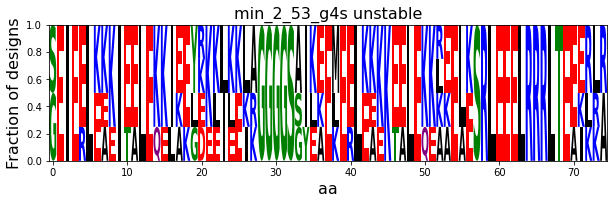

In [23]:
#also plot two populations of binding behavior for min_2_53_g4s 
#have enough in these two populations to potentailly make a meanigful comparsion
min_type = 'min_2_53_g4s'
binding_bin = 'expected binding'

filtered_df = df[df['min_type'].str.contains(min_type, na=False)]
filtered_df = filtered_df[~filtered_df['Kds_norm_to_expected_binned_rep2'].str.contains(binding_bin, na=False)]
# min0_52_bm01_expected_binding_df  = min0_52_bm01_expected_binding_df[(min0_52_bm01_expected_binding_df['Kds_norm_to_expected_binned_rep1'] == binding_bin) &
#                                 (min0_52_bm01_expected_binding_df['Kds_norm_to_expected_binned_rep2'] == binding_bin) &
#                                  (min0_52_bm01_expected_binding_df['errs_rep1'] > 0.7) &
#                                  (min0_52_bm01_expected_binding_df['errs_rep2'] > 0.7)]

print(filtered_df.shape)

seq_list_for_logo = filtered_df['full_protein_sequence'].tolist()

seq_logo_mat = lg.alignment_to_matrix(seq_list_for_logo, counts=None,
to_type='counts', characters_to_ignore='X')

seq_logo_mat_norm = seq_logo_mat.div(len(seq_list_for_logo))

logo = lg.Logo(seq_logo_mat_norm, color_scheme='chemistry') 
logo.ax.set_xticks(range(0, 80, 10))
logo.ax.set_title(f'{min_type} {stability}', fontsize=16)
logo.ax.set_ylabel('Fraction of designs', fontsize=16)
logo.ax.set_xlabel('aa', fontsize=16)

#logo_fig = logo.get_figure()
plt.savefig(f'{outdir}/{exp_id}_{min_type}_unexpected_binding.pdf')